In [ ]:
#To produce all of the plots (one for each test subject), I can either just change the filename, screenshot
#and paste in another document. Or, I can do something like this:

#filenames = ['Jewell_data.csv', 'Jay_data.csv', ...]

#formatted_data = []
#  open file
#  create formatted dataset (colPoints)
#for filename in filenames:
#    points = hr_data(filename)
#    formatted_data.append(row2Col(points))
#  call function to plot

#note: make sure that plots don't overwrite each other.



import csv

def hr_data(filename):
    lines = []
    data = open(filename, "r") #open the file
    all_records = csv.reader(data, delimiter=",") #read the file
    
    #Removing header line
    next(data, None)
    #removing empty lines and empty spaces
    for i in data:
        i = i.rstrip()   
        if i != '':
            points = i.split(",")     
            
            #Delete LAST TWO elements to account for trailing
            lines.append(points[:len(points)-2])
    
    
    
    for row in all_records:  #loop over rows in the list all_records
        lines.append(row)
        
    return lines

def row2Col(arr):
    #Number of elements in a row (i.e number of exercises)
    count = len(arr[0])
    
    #colArr will hold the new list of columns
    colArr = []
    
    #Initialize the column array to a list of 'count' empty lists
    for i in range(count):
        empty = []
        colArr.append(empty)
    
    #We iterate through each exercise and then add the element to the corresponding column
    for i in range(count):
        for row in arr:
            #Only add non empty element
            if (row[i]!=''):
                colArr[i].append(row[i])
    
    return colArr
            
selectfile = hr_data(input("Choose subject data: Jay_Data.csv, Jeremy_Data.csv, Mila_Data.csv, Rachel_Data.csv, Nolan_Data.csv, Nako_Data.csv, Jewell_Data.csv, Dillon_Data.csv"))

colPoints = row2Col(selectfile)

print(colPoints)





In [33]:


range_low = 160
range_high = 180

def calculate(range_low, range_high):
    for workout in colPoints:
        count = 0
        numPoints = len(workout)
        print("num points: ", numPoints)
    for current_val in workout:
        if (int(current_val) > range_low and int(current_val) < range_high):
            count = count + 1

    percent = (count/numPoints)*100
    return percent

num points:  781
num points:  1227
num points:  570
num points:  547
num points:  698
num points:  937
num points:  507
num points:  1720
num points:  404
num points:  174
num points:  411
num points:  607
num points:  896
num points:  2060
num points:  1554
num points:  603
num points:  1848
num points:  811
num points:  1206
num points:  864
num points:  1241
num points:  1610
num points:  781
num points:  774
num points:  682
num points:  956
num points:  1078
num points:  1259
num points:  816
num points:  680
num points:  468
num points:  196
num points:  993
num points:  863
num points:  3292
num points:  1209
num points:  1306
num points:  1744
num points:  1788


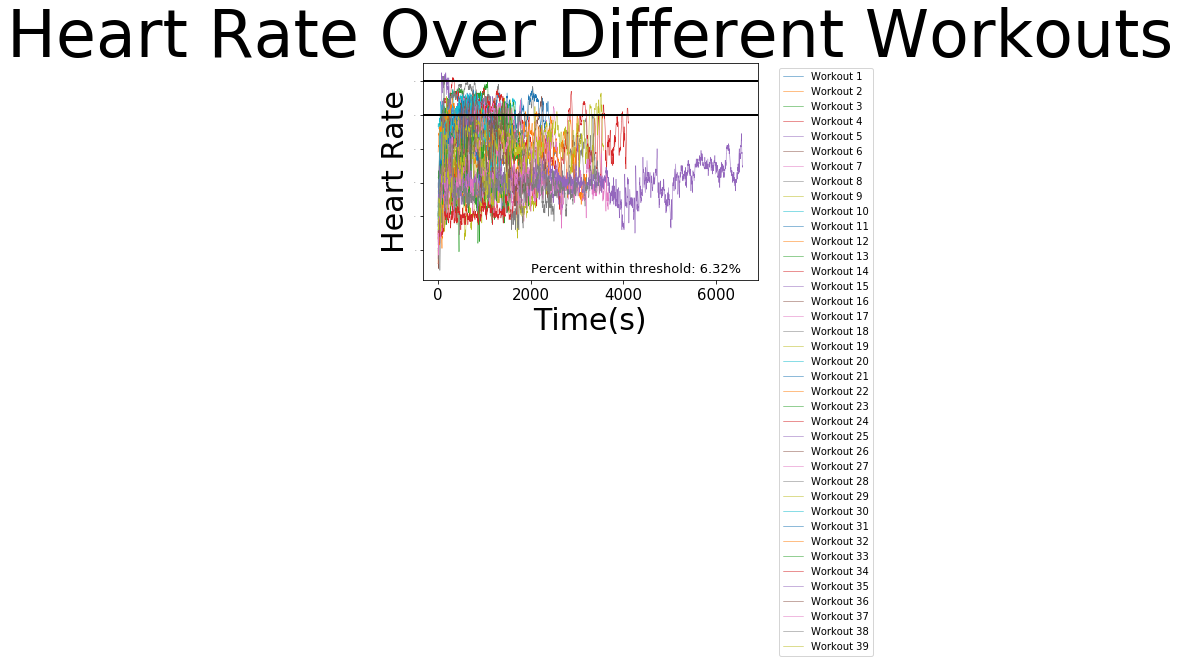

In [35]:
#Creating time array

tinterval=2
tlen=[]
times=[]

for i in range(len(colPoints)):
    
    #finding the length of a workout column
    tlength=len(colPoints[i])
    #adding the length to an array 
    tlen.append(tlength)
    
    #create an empty array (times) of arrays, the same amount as colPoints.
    
    times.append([])
    
#Initiate variable as 0. Want counter to start at 0. (n is our counter)
n=0

#tlen = [L1, L2, L3, ..., L8]
#Where each L value is the number of values in some workout column.
for length in tlen:
    for i in range(length):
        t=tinterval*i
        times[n].append(t)

    n = n + 1 


from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import signal

fig = plt.figure()
for i in range(len(colPoints)):
    #times is array of arrays.  times[i] gives you an array consisting of independent (x axis) points for some
    #workout column i
    
    #colPoints is an array of arrays. colPoints[i] gives you an array containing the dependent (y axis)
    #data for i=0 (first workout), i=2 (second workout), etc.
    #if i=1, i'm looking at the second workout.
    plt.plot(times[i],colPoints[i],label="Workout "+str(i+1),linewidth=0.5)

plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('Heart Rate',fontsize=30)
plt.title('Heart Rate Over Different Workouts',fontsize=65)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=1)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)   #legend placement


#adding in the percent within threshold calculation
range_low = 160
range_high = 180

perc_val = round(calculate(range_low, range_high), 2)
perc_str = "Percent within threshold: " + str(perc_val) + "%"

ax = fig.add_subplot(111)
ax.text(0.95, 0.02, perc_str, verticalalignment = 'bottom', horizontalalignment = 'right',
       transform=ax.transAxes, color='black', fontsize=13)

plt.axhline(y= range_low, c="black",linewidth=2)
plt.axhline(y= range_high, c="black",linewidth=2)


plt.show()